In [12]:
import pandas as pd
from pylab import *
from matplotlib import animation,rc
from IPython.display import HTML
colombia=pd.read_csv("https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv?accessType=DOWNLOAD")

In [18]:
top_ten=colombia[colombia.columns[3]].value_counts().index
datos=colombia[colombia[colombia.columns[3]].isin(top_ten)] #los diez mas al final del periodo
sin_dato=datos[datos[datos.columns[13]]=='SIN DATO'].index
datos=datos.drop(sin_dato, axis=0) #Eliminar fechas sin dato
datos=datos.sort_values([datos.columns[3],datos.columns[13]]) #ordenar por ciudad y fecha
datos[datos.columns[13]]=pd.to_datetime(datos[datos.columns[13]],format="%Y/%m/%d") #formato de fecha
datos=datos.reset_index(drop=True)
colores={i:[random(),1,random()] for i in datos[datos.columns[4]].unique()}

In [19]:
#RESET 
ciudades=datos.iloc[:,[3,4,13]] #[ciudad,depto,fecha]
ciudades.columns=["ciudad","depto","fecha"]
dic_deptos=ciudades.set_index("ciudad")["depto"].to_dict()
ciudades=ciudades.groupby(["ciudad","fecha"]).count()
ciudades["suma"]=ciudades.groupby(["ciudad"]).cumsum()
ciudades.columns=["diario","suma"]
ciudades=ciudades.reset_index()
ciudades["depto"]=ciudades["ciudad"].map(dic_deptos)

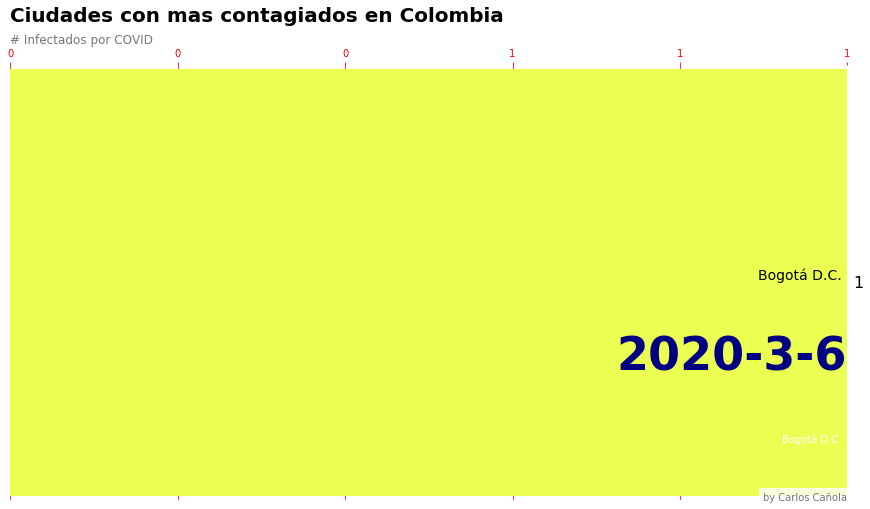

In [20]:
def race(year):    
    
    funcion=ciudades[ciudades.fecha.eq(year)].sort_values(by="suma",ascending=True)[-10:]    
    ax.clear()
    ax.barh(funcion.ciudad, funcion.suma, color=[colores[dic_deptos[x]] for x in funcion['ciudad']])
    dx = funcion['suma'].max() /150
    
    for i, (suma,ciudad) in enumerate(zip(funcion.suma,funcion.ciudad)):
        
        ax.text(suma-dx,i,ciudad,size=14,color="black",weight=500,ha="right",va="bottom")  #ciudad  
        ax.text(suma-dx, i-.30, dic_deptos[ciudad], size=10, color='white', ha='right', va='baseline') #depto
        ax.text(suma+dx,i,f'{suma:,.0f}',size=16,ha="left",va="center") #el numero
          
    ax.text(1, 0.3, "{}-{}-{}".format(year.year,year.month,year.day), transform=ax.transAxes, color='navy', size=46, ha='right', weight=700) #FECHA
    ax.text(0, 1.05, '# Infectados por COVID', transform=ax.transAxes, size=12, color='#777777') #letrero arriba
    ax.xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top') #numeracion arriba
    ax.tick_params(axis='x', colors='red', labelsize=10) #tamaño y color de la numeracion
    ax.set_yticks([]) #quitar nombres eje y
    ax.margins(0, 0.01) #margen estrecho
    ax.grid(which='major', axis='x', linestyle='solid',color="red") #grid
    ax.set_axisbelow(True) #llevar el grid al fondo
    ax.text(0, 1.10, 'Ciudades con mas contagiados en Colombia',
            transform=ax.transAxes, size=20, weight=600, ha='left')
    ax.text(1, 0, 'by Carlos Cañola', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)


fig, ax = plt.subplots(figsize=(15, 8))
# race("2020-06-01")
intervalo=sorted(pd.to_datetime(ciudades.fecha.unique()))
animator=animation.FuncAnimation(fig,race,frames=intervalo)
rc("animation",ffmpeg_path=r'C:/Users/Carlos/Downloads/FFmpeg/bin/ffmpeg.exe')
HTML(animator.to_html5_video())
# HTML(animator.to_jshtml())

In [21]:
# animator.save("otra animacion.mp4",writer=animation.FFMpegWriter(fps=2))